### Extreme Gradient Boosting (XGBoost)

**Extreme Gradient Boosting**, or **XGBoost**, is an advanced implementation of the gradient boosting algorithm with several enhancements to improve its performance and efficiency. While many of these features are available in other gradient boosting frameworks, XGBoost is known for its specific optimizations and performance.

#### Common Features in Gradient Boosting Frameworks:

- **Regularization**: Adds penalties to the complexity of the model to prevent overfitting.
- **Parallel Processing**: Uses multiple CPU cores to speed up parts of the computation, such as tree construction and feature evaluation.
- **Handling Missing Data**: Efficiently manages datasets with missing values.
- **Tree Pruning**: Optimizes the decision trees by stopping the growth of trees earlier based on certain criteria.
- **Sparsity Awareness**: Optimized for handling sparse data (data with many zero or missing values).

#### Unique Enhancements in XGBoost:

- **Efficient Memory Usage**: XGBoost implements more efficient memory usage, allowing it to handle larger datasets more effectively.
- **Cache Awareness**: Optimizes the use of hardware cache to speed up computation.
- **Scalable and Distributed Computing**: XGBoost supports distributed computing for training models on large datasets across multiple machines.

These features make XGBoost a powerful and efficient algorithm for building robust machine learning models.

### Summary

While many gradient boosting frameworks share common features, XGBoost's specific optimizations and performance enhancements make it a popular choice for many machine learning tasks.


In [9]:
# XGBoost Classification with Breast Cancer Dataset

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
#import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = XGBClassifier(random_state=42, eval_metric='logloss')

model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)

# Custom thresholds
thresholds = np.arange(0, 1.1, 0.1)

# Initialize lists for confusion matrix components
tps = []
fps = []
tns = []
fns = []

# Calculate true positives, false positives, true negatives, and false negatives for each threshold
for threshold in thresholds:
    temp_prediction = [1 if y >= threshold else 0 for y in y_pred_proba]
    tn, fp, fn, tp = confusion_matrix(y_test, temp_prediction).ravel()
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)

# Create the dataframe with thresholds, true positives, false positives, true negatives, and false negatives
df_confusion_matrix = pd.DataFrame({'Thresholds': thresholds, 
                                    'TruePositive': tps, 'FalsePositive': fps,
                                    'TrueNegative': tns, 'FalseNegative': fns})

# Calculate recall, precision, F1 score, and false positive ratio
df_confusion_matrix["recall"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalseNegative"])
df_confusion_matrix["precision"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalsePositive"])
df_confusion_matrix["f1_score"] = 2 * (df_confusion_matrix["precision"] * df_confusion_matrix["recall"]) / (df_confusion_matrix["precision"] + df_confusion_matrix["recall"])


In [10]:
df_confusion_matrix

,Thresholds,TruePositive,FalsePositive,TrueNegative,FalseNegative,recall,precision,f1_score
0,0.0,108,63,0,0,1.000000,0.631579,0.774194
1,0.1,107,5,58,1,0.990741,0.955357,0.972727
2,0.2,106,5,58,2,0.981481,0.954955,0.968037
3,0.3,106,5,58,2,0.981481,0.954955,0.968037
4,0.4,105,2,61,3,0.972222,0.981308,0.976744
5,0.5,105,2,61,3,0.972222,0.981308,0.976744
6,0.6,104,1,62,4,0.962963,0.990476,0.976526
7,0.7,104,1,62,4,0.962963,0.990476,0.976526
8,0.8,104,1,62,4,0.962963,0.990476,0.976526
9,0.9,102,1,62,6,0.944444,0.990291,0.966825


Feature importances:
mean concave points: 0.4955
worst concave points: 0.1083
worst perimeter: 0.1000
worst radius: 0.0461
worst texture: 0.0271
worst area: 0.0266
worst concavity: 0.0256
radius error: 0.0249
perimeter error: 0.0224
concavity error: 0.0210
mean symmetry: 0.0182
mean texture: 0.0154
worst fractal dimension: 0.0131
fractal dimension error: 0.0095
area error: 0.0081
worst smoothness: 0.0067
smoothness error: 0.0052
texture error: 0.0049
compactness error: 0.0044
mean compactness: 0.0043
worst symmetry: 0.0030
mean fractal dimension: 0.0022
mean smoothness: 0.0022
mean concavity: 0.0019
symmetry error: 0.0011
mean area: 0.0010
concave points error: 0.0007
worst compactness: 0.0004
mean perimeter: 0.0000
mean radius: 0.0000


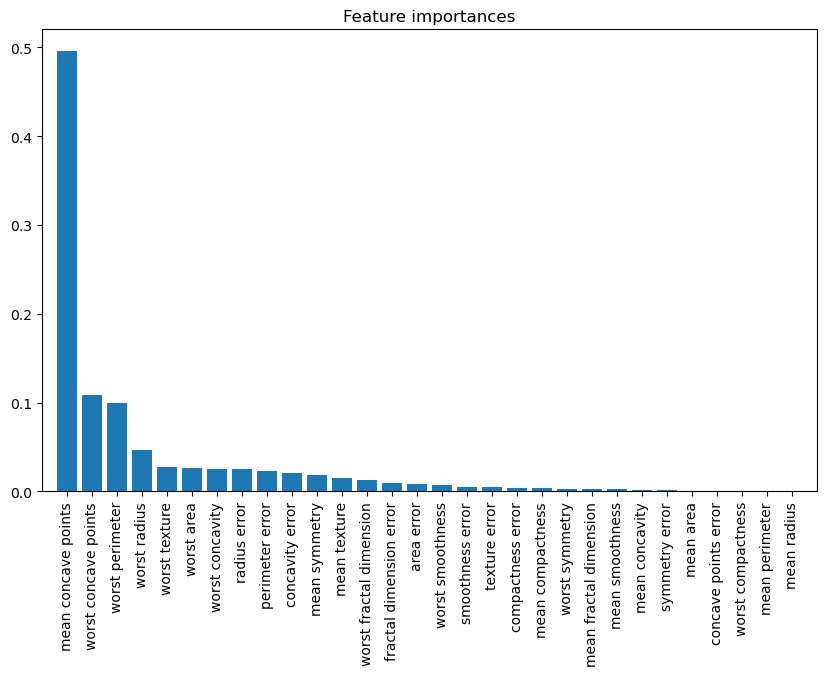

In [11]:
# Create a new figure for plotting
fig = go.Figure()

# Round the values in the df_confusion_matrix DataFrame to two decimal places
df_confusion_matrix_graph = df_confusion_matrix.round(3)

fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['recall'], mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['precision'], mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')

# Display the figure
fig.show()

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = breast_cancer.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Mean Squared Error: 0.2226
R-Squared: 0.8301
Feature importances:
MedInc: 0.4896
AveOccup: 0.1486
Longitude: 0.1080
Latitude: 0.0903
HouseAge: 0.0701
AveRooms: 0.0431
AveBedrms: 0.0257
Population: 0.0247


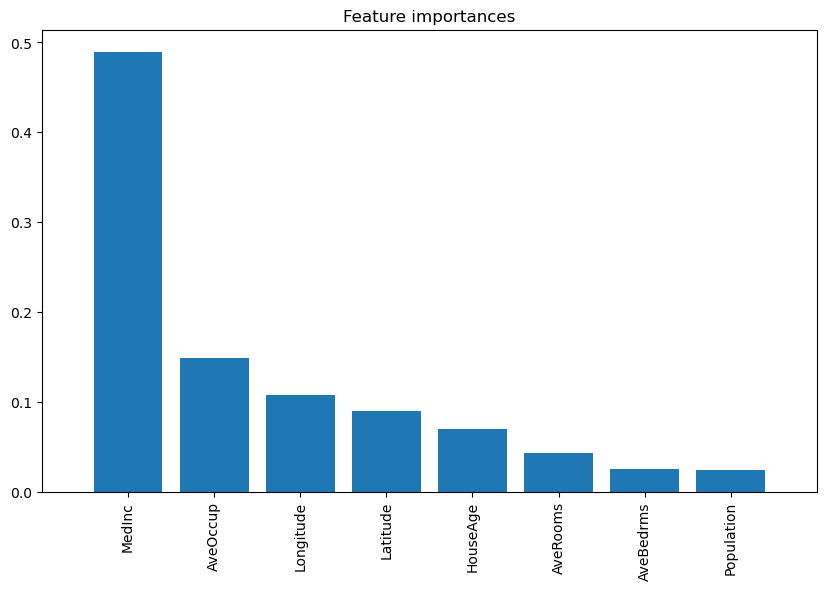

In [12]:
# XGBoost Regression with California Housing Dataset

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = XGBRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Mean Squared Error: 0.2091
R-Squared: 0.8404
Feature importances:
MedInc: 0.4478
AveOccup: 0.1569
Longitude: 0.1145
Latitude: 0.1044
HouseAge: 0.0666
AveRooms: 0.0478
AveBedrms: 0.0316
Population: 0.0304


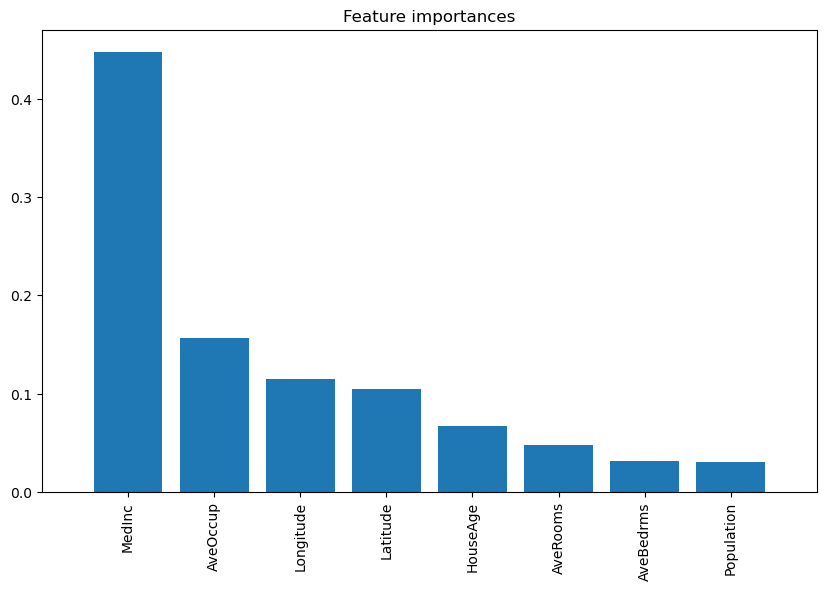

In [3]:
# XGBoost Regression with California Housing Dataset and Cross-Validation for Hyperparameter Tuning

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = XGBRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
